<a href="https://colab.research.google.com/github/mgersins-design/Machine-Learning/blob/main/HW3/Cancer_Type_LogLoss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.datasets import load_breast_cancer


In [2]:
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape

breast_input = pd.DataFrame(breast_data)
breast_input.head()

breast_labels = breast.target
breast_labels.shape

labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

In [3]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
features_labels = np.append(features, 'label')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

breast_dataset.tail()

/tmp/ipython-input-3420149812.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  breast_dataset['label'].replace(0, 'Benign',inplace=True)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [6]:
X = breast_dataset.drop(columns='label', axis=1).values
Y = breast_dataset['label'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = 0.01
n_epochs = 60
lambda_ = 0.01

model = SGDClassifier(loss='log_loss', penalty = 'l2', alpha = lambda_, random_state=42, eta0=lr, learning_rate='constant')

train_loss_history = []
test_loss_history = []

# Manuelle Trainingsschleife
for epoch in range(n_epochs):
    # Trainiere das Modell für eine einzige Epoche
    # Die 'classes' müssen beim ersten Aufruf angegeben werden
    model.partial_fit(X_train_scaled, Y_train, classes=np.unique(Y))

    # Vorhersage der Wahrscheinlichkeiten, um den Loss zu berechnen
    y_train_pred_proba = model.predict_proba(X_train_scaled)
    y_test_pred_proba = model.predict_proba(X_test_scaled)

    # Berechne den Log-Loss für Training und Test
    train_loss = log_loss(Y_train, y_train_pred_proba)
    test_loss = log_loss(Y_test, y_test_pred_proba)

    # Füge die Werte zu den Listen hinzu
    train_loss_history.append(train_loss)
    test_loss_history.append(test_loss)

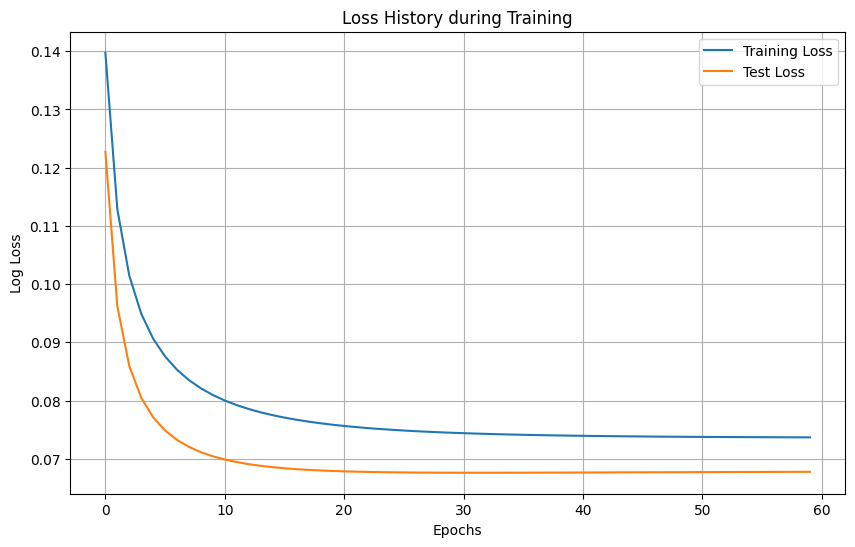

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(range(n_epochs), train_loss_history, label='Training Loss')
plt.plot(range(n_epochs), test_loss_history, label='Test Loss')
plt.title('Loss History during Training')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)
plt.show()


--- Final Model Performance ---
Accuracy:  0.9825
Precision: 0.9726
Recall:    1.0000
F1-Score:  0.9861


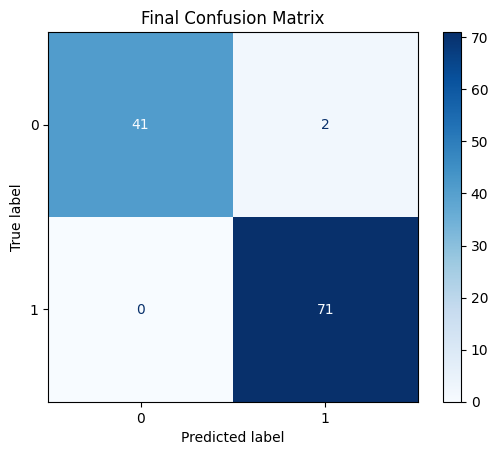

In [8]:
# Final Prediction of test set
y_pred_final = model.predict(X_test_scaled)

# Define which label is the "positive" one
POSITIVE_LABEL = 'Malignant'
# Accuracy doesn't need the positive label
accuracy = accuracy_score(Y_test, y_pred_final)
# Specify the positive label for the other metrics
precision = precision_score(Y_test, y_pred_final, pos_label=POSITIVE_LABEL)
recall = recall_score(Y_test, y_pred_final, pos_label=POSITIVE_LABEL)
f1 = f1_score(Y_test, y_pred_final, pos_label=POSITIVE_LABEL)
print("\n--- Final Model Performance ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Plot of Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Final Confusion Matrix")
plt.show()